<a href="https://colab.research.google.com/github/Deepikar02/NLP-ASSIGNMENT/blob/main/NLP_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
upload = files.upload()

Saving IMDB Dataset.csv (1).zip to IMDB Dataset.csv (1).zip


In [4]:
from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
import pandas as pd
df = pd.read_csv('IMDB Dataset.csv (1).zip',na_values=(' '),encoding='latin-1')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [7]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd

# Example preprocessing function
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r"[^A-Za-z\s]", "", text)

    # Convert to lowercase
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)

# Example usage
sample_text = "This is an example sentence, showing how preprocessing works in NLP!"
preprocessed_text = preprocess_text(sample_text)

# Print the output
print("Original text:", sample_text)
print("Preprocessed text:", preprocessed_text)


Original text: This is an example sentence, showing how preprocessing works in NLP!
Preprocessed text: example sentence showing preprocessing work nlp


In [8]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd

# Example preprocessing function
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r"[^A-Za-z\s]", "", text)

    # Convert to lowercase
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)

Module 2

In [9]:
print(df.columns)


Index(['review', 'sentiment'], dtype='object')


In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming df contains your data with the column 'review'
print(df.columns)  # Confirming the available columns

# Initialize TF-IDF Vectorizer with a maximum of 5000 features
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the 'review' column
X = vectorizer.fit_transform(df['review'])

# Display the shape of the TF-IDF matrix
print(f"TF-IDF matrix shape: {X.shape}")

# Optionally, display some of the TF-IDF feature names and corresponding values
feature_names = vectorizer.get_feature_names_out()
print(f"Sample TF-IDF feature names: {feature_names[:10]}")


Index(['review', 'sentiment'], dtype='object')
TF-IDF matrix shape: (50000, 5000)
Sample TF-IDF feature names: ['00' '000' '10' '100' '11' '12' '13' '13th' '14' '15']


MODULE 3

Silhouette Score: -0.0030929413841999567


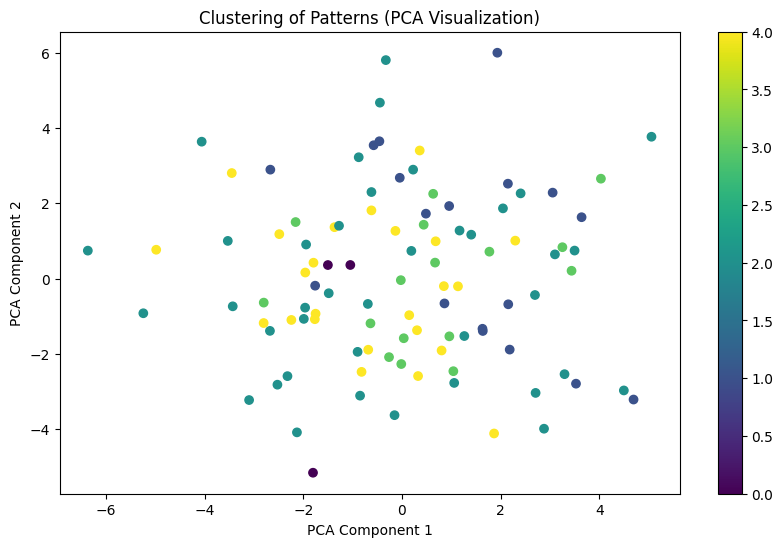

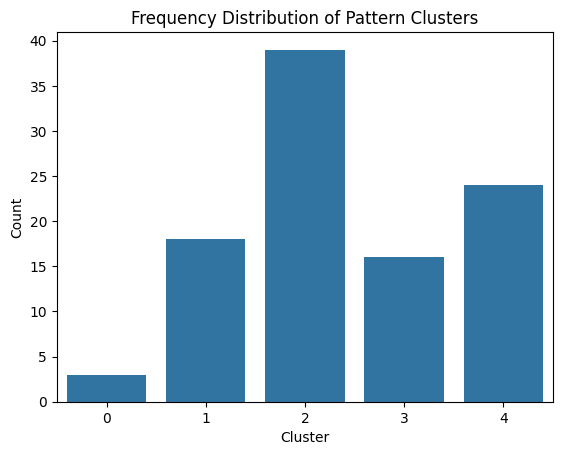

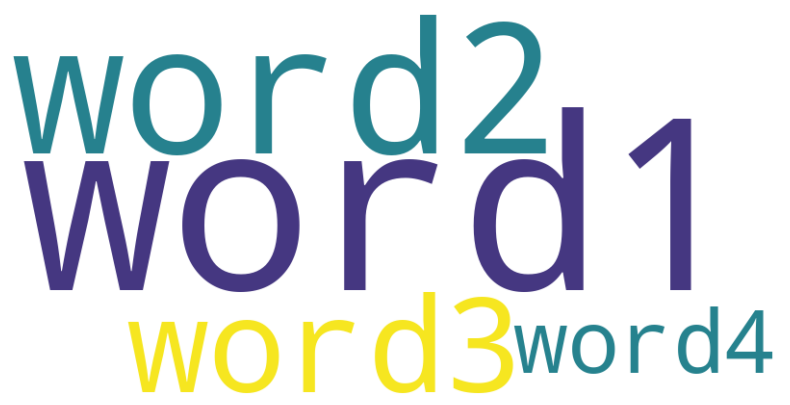

Clustering results saved to 'pattern_clustering_results.csv'


In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from wordcloud import WordCloud
import spacy

# Load the spacy model (ensure you've installed it in Colab: !python -m spacy download en_core_web_sm)
nlp = spacy.load('en_core_web_sm')

# Assuming you have preprocessed data from the previous modules, load the dataset
# For demonstration, we'll create a dummy dataset of patterns
# Replace this with your actual TF-IDF matrix or pattern matrix
data = pd.DataFrame(np.random.rand(100, 5000))  # Replace with actual data
patterns = ['word1', 'word2', 'word3', 'word4']  # Replace with your actual list of patterns

# Step 1: Pattern Clustering (using K-Means)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(data)

# Evaluate clustering using silhouette score
silhouette_avg = silhouette_score(data, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Step 2: Dimensionality Reduction for Visualization using PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# Visualizing the clusters in 2D
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis')
plt.title("Clustering of Patterns (PCA Visualization)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar()
plt.show()

# Step 3: Statistical Analysis - Frequency Distribution of Patterns
pattern_counts = pd.Series(clusters).value_counts()
sns.barplot(x=pattern_counts.index, y=pattern_counts.values)
plt.title("Frequency Distribution of Pattern Clusters")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

# Step 4: Word Cloud Visualization of Patterns
# Create a word cloud based on the detected patterns (if available)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(patterns))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Step 5: Reporting - Save the clusters and PCA results
clustered_data = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
clustered_data['Cluster'] = clusters
clustered_data.to_csv('pattern_clustering_results.csv', index=False)
print("Clustering results saved to 'pattern_clustering_results.csv'")
